<a href="https://colab.research.google.com/github/joshikavita01/get-started-python/blob/main/Assignment_2_Kavita_Joshi_M20AIE244.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
# set up the environment
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
from google.colab import drive
from skimage import color

print("All set to go")

All set to go


Mounted at /content/gdrive
['WhatsApp Image 2022-08-22 at 7.18.12 PM.jpeg', 'WhatsApp Image 2022-08-24 at 5.17.14 PM.jpeg', 'WhatsApp Image 2022-08-24 at 5.17.17 PM (1).jpeg', 'WhatsApp Image 2022-08-24 at 5.17.18 PM.jpeg', 'WhatsApp Image 2022-08-24 at 5.19.00 PM.jpeg', 'input_image-1.jpg']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  del sys.path[0]


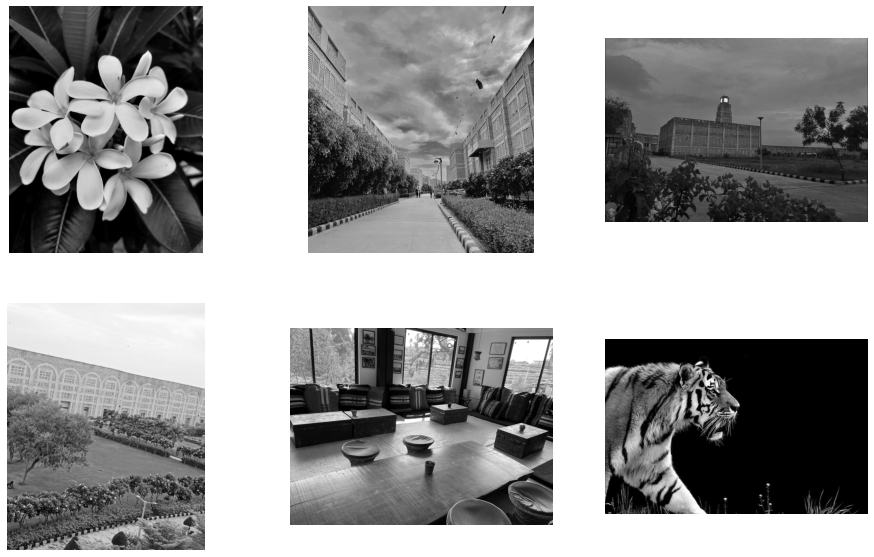

In [117]:
# Mount the drive and get the images
drive.mount('/content/gdrive', force_remount=True)
img_dir = "./gdrive/My Drive/Colab-images/Edge-detection"
flist = sorted([f for f in listdir(img_dir) if isfile(join(img_dir, f))])
print(flist)

fig = plt.figure(figsize=(16,10)) # Using a large canvas to depict the images clearly
n = len(flist)
images_gray=[]
for i in range(n):
  fig.add_subplot(2,n//2,i+1)
  img_bgr = cv2.imread(join(img_dir,flist[i]),0)
  img_gray = color.rgb2gray(img_bgr) # Convert image to grayscale 
  images_gray.append(img_gray[:,:]) 
  plt.imshow(img_gray,cmap='gray')
  plt.axis('off')



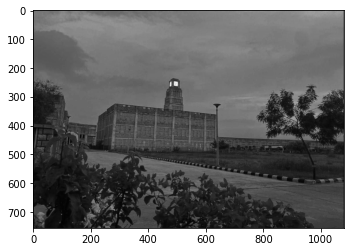

In [118]:
image_index = 2 # use some man made object image
mm_image = images_gray[image_index]
plt.imshow(mm_image, cmap="gray")

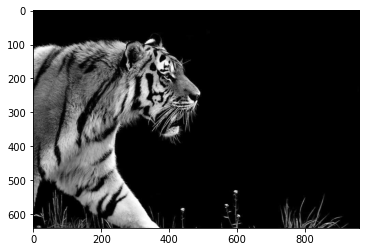

In [119]:
# Choose any of the images
image_index2 = 5 # use some natural image
natural_image2 = images_gray[image_index2]
plt.imshow(natural_image2, cmap="gray")

In [120]:
from google.colab.patches import cv2_imshow

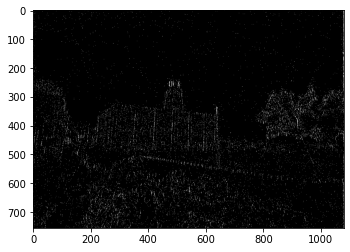

In [121]:
# Filter through DoG
# Typical values for sigma can range from 0.25 to 8, and typical window values can range from (3,3) to (7,7)
low_sigma = cv2.GaussianBlur(mm_image,(5,5),4, 4,cv2.BORDER_DEFAULT)
high_sigma = cv2.GaussianBlur(mm_image,(5,5),8, 8,cv2.BORDER_DEFAULT)
dog_mm= low_sigma-high_sigma
plt.imshow(dog_mm, cmap="gray")


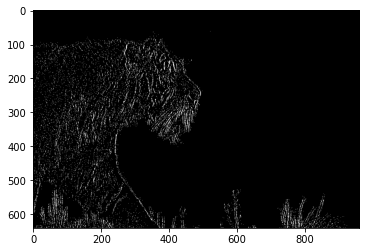

In [122]:
low_sigma = cv2.GaussianBlur(natural_image2,(5,5),4, 4,cv2.BORDER_DEFAULT)
high_sigma = cv2.GaussianBlur(natural_image2,(5,5),8, 8,cv2.BORDER_DEFAULT)
dog_natural= low_sigma-high_sigma
plt.imshow(dog_natural, cmap="gray")

Calulating Convolution for ManMade Object with two differnt convolutions functions 

In [123]:
#2D convolution function- Used in Assignment 1
# https://colab.research.google.com/drive/1P-PHPX_MsT0DTa3hRYAwojsrj2SzfwqM?authuser=1#scrollTo=pa1KL38AaFNJ
[r, col] = np.shape(dog_mm)
sobel_image = np.zeros(shape=(r, col)) 
def my2Dconvolution(filter, image):
  for i in range(r - 2):
    for j in range(col - 2):
        x_direction = np.sum(np.multiply(filter, dog_mm[i:i + 3, j:j + 3]))  # x direction
        y_direction = np.sum(np.multiply(filter, dog_mm[i:i + 3, j:j + 3]))  # y direction
        sobel_image[i + 1, j + 1] = np.sqrt(x_direction ** 2 + y_direction ** 2)  # calculate the "hypotenuse"
  return sobel_image

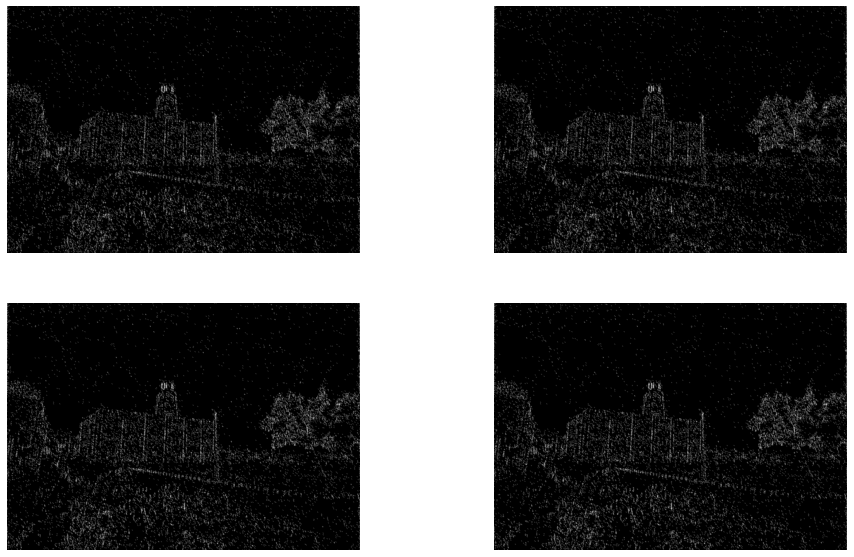

In [124]:
# Detect edges in four orientation
# Define filters
filter000 = np.array([[-1.0, -1.0, -1.0], 
                      [0.0, 0.0, 0.0], 
                      [1.0, 1.0, 1.0]])
filter045 = np.array([[0.0, -1.0, -2.0], 
                      [1.0, 0.0, -1.0], 
                      [2.0, 1.0, 0.0]])
filter090 =  np.array([[-1.0, 0.0, 1.0],
                      [-1.0, 0.0, 1.0],
                      [-1.0, 0.0, 1.0]])
filter135 = np.array([[-2.0, -1.0, 0.0], 
                      [-1.0, 0.0, 1.0], 
                      [0.0, 1.0, 2.0]])

# such as cv2.filter2D() see https://www.geeksforgeeks.org/python-opencv-filter2d-function/
edges000 = my2Dconvolution(filter000, dog_mm)
edges045 = my2Dconvolution(filter045, dog_mm)
edges090 = my2Dconvolution(filter090, dog_mm)
edges135 = my2Dconvolution(filter135, dog_mm)

# Plot edge images
edge_images = np.array([edges000, edges045, edges090, edges135])

fig = plt.figure(figsize=(16,10)) # Using a large canvas to depict the images clearly
for i in range(4):
  fig.add_subplot(2,2,i+1)
  plt.imshow(edge_images[i],cmap='gray')
  plt.axis('off')




Implementing WTA and normalization 

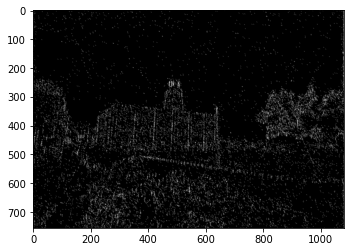

In [125]:
# Pickup the strongest edge at any location and normalize. Ignore weak edges
# Show the final image
wnng_edge = np.max(edge_images, axis = 0)
plt.imshow(wnng_edge, cmap="gray")




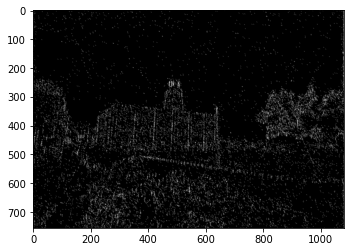

In [126]:
sum_image = np.sum(edge_images, axis = 0)
plt.imshow(sum_image, cmap="gray")

Creating the final image

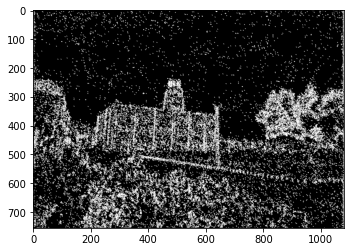

In [127]:
output_image = np.divide(wnng_edge, sum_image,  where=sum_image!=0)
plt.imshow(output_image, cmap="gray")


Calulating Convolution forNatural Object with two differnt convolutions functions

In [128]:
#2D convolution function- Used in Assignment 1
# https://colab.research.google.com/drive/1P-PHPX_MsT0DTa3hRYAwojsrj2SzfwqM?authuser=1#scrollTo=pa1KL38AaFNJ
[r, col] = np.shape(dog_natural)
sobel_image = np.zeros(shape=(r, col)) 
def my2Dconvolution(filter, image):
  for i in range(r - 2):
    for j in range(col - 2):
        x_direction = np.sum(np.multiply(filter, dog_natural[i:i + 3, j:j + 3]))  # x direction
        y_direction = np.sum(np.multiply(filter, dog_natural[i:i + 3, j:j + 3]))  # y direction
        sobel_image[i + 1, j + 1] = np.sqrt(x_direction ** 2 + y_direction ** 2)  # calculate the "hypotenuse"
  return sobel_image

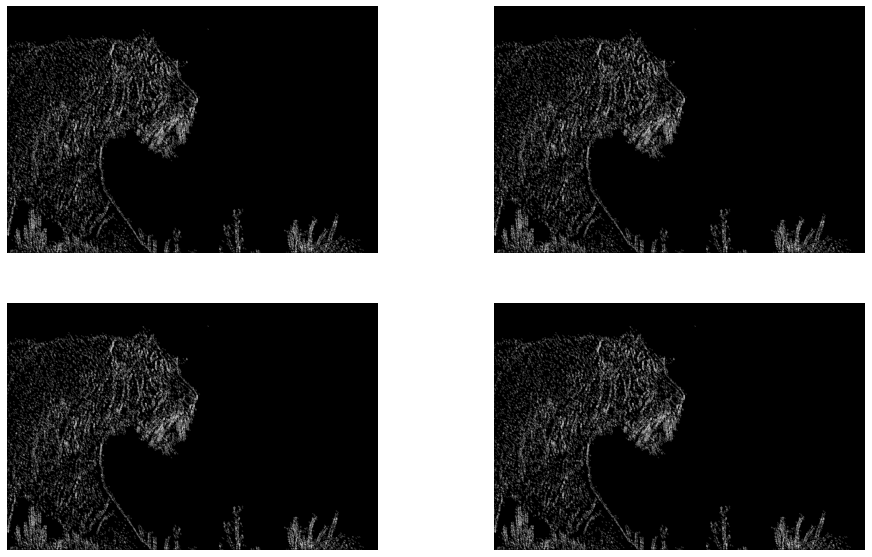

In [129]:
# Detect edges in four orientation
# Define filters
filter000 = np.array([[-1.0, -1.0, -1.0], 
                      [0.0, 0.0, 0.0], 
                      [1.0, 1.0, 1.0]])
filter045 = np.array([[0.0, -1.0, -2.0], 
                      [1.0, 0.0, -1.0], 
                      [2.0, 1.0, 0.0]])
filter090 =  np.array([[-1.0, 0.0, 1.0],
                      [-1.0, 0.0, 1.0],
                      [-1.0, 0.0, 1.0]])
filter135 = np.array([[-2.0, -1.0, 0.0], 
                      [-1.0, 0.0, 1.0], 
                      [0.0, 1.0, 2.0]])

# such as cv2.filter2D() see https://www.geeksforgeeks.org/python-opencv-filter2d-function/
edges000 = my2Dconvolution(filter000, dog_natural)
edges045 = my2Dconvolution(filter045, dog_natural)
edges090 = my2Dconvolution(filter090, dog_natural)
edges135 = my2Dconvolution(filter135, dog_natural)

# Plot edge images
edge_images2 = np.array([edges000, edges045, edges090, edges135])

fig = plt.figure(figsize=(16,10)) # Using a large canvas to depict the images clearly
for i in range(4):
  fig.add_subplot(2,2,i+1)
  plt.imshow(edge_images2[i],cmap='gray')
  plt.axis('off')


Implementing WTA and normalization

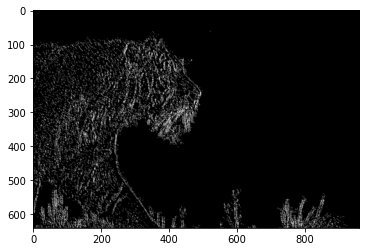

In [130]:
# Pickup the strongest edge at any location and normalize. Ignore weak edges
# Show the final image
wnng_edge = np.max(edge_images2, axis = 0)
plt.imshow(wnng_edge, cmap="gray")

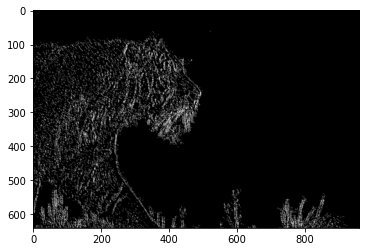

In [131]:
sum_image = np.sum(edge_images2, axis = 0)
plt.imshow(sum_image, cmap="gray")

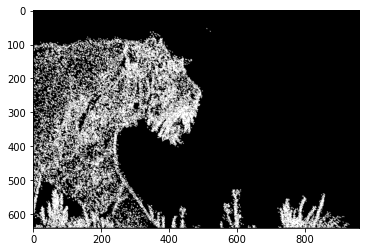

In [132]:
output_image = np.divide(wnng_edge, sum_image,  where=sum_image!=0)
plt.imshow(output_image, cmap="gray")